In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("/content/drive/MyDrive/Colab Notebooks/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         Date User timetype   time         Message
0  2020-02-29  조은영       오후   9:26              사진
1  2020-02-29  조은영       오후   9:26       넘 많이 쓴다아아
2  2020-02-29  조은영       오후   9:38  재정관리와 자기관리를 위해
3  2020-03-01  조은영       오전  12:09         안녕히주무세요
4  2020-03-01  손정희       오전  12:09            이모티콘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3961 non-null   object
 1   User      3961 non-null   object
 2   timetype  3961 non-null   object
 3   time      3961 non-null   object
 4   Message   3961 non-null   object
dtypes: object(5)
memory usage: 154.9+ KB
None


In [3]:
users = set(data["User"])
users

{'손정희', '아빵', '조은영', '조은정', '조찬우', '쪼아'}

In [4]:
authors = data.groupby('User')
pprint(authors.groups)
print(type(authors.groups))

{'손정희': Int64Index([   4,    6,   11,   14,   16,   17,   18,   19,   20,   21,
            ...
            3928, 3929, 3932, 3936, 3938, 3943, 3944, 3949, 3950, 3952],
           dtype='int64', length=1360),
 '아빵': Int64Index([ 516,  590,  608,  609,  610,  611,  673,  674,  689,  692,
            ...
            3779, 3780, 3783, 3784, 3785, 3786, 3894, 3914, 3915, 3916],
           dtype='int64', length=155),
 '조은영': Int64Index([   0,    1,    2,    3,    5,    7,    8,    9,   10,   12,
            ...
            3903, 3904, 3907, 3909, 3912, 3913, 3925, 3926, 3927, 3930],
           dtype='int64', length=1603),
 '조은정': Int64Index([  33,   34,   50,   52,   57,   61,   62,   65,   66,   68,
            ...
            3948, 3951, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960],
           dtype='int64', length=442),
 '조찬우': Int64Index([1103, 1108, 1156, 1210, 1211, 1381, 1382, 1383, 1384, 1385,
            ...
            3442, 3466, 3728, 3729, 3738, 3739, 3740, 3741, 3742, 3743]

In [5]:
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'손정희': [4, 6, 11, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 38, 39, 40, 43, 45, 49, 51, 53, 54, 56, 60, 63, 67, 70, 73, 76, 81, 83, 84, 86, 87, 93, 94, 99, 100, 102, 104, 105, 106, 107, 108, 109, 110, 112, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 156, 160, 165, 168, 169, 170, 172, 173, 174, 175, 179, 182, 183, 187, 188, 190, 192, 193, 194, 195, 199, 200, 210, 212, 215, 216, 218, 219, 221, 222, 225, 229, 230, 231, 235, 239, 241, 245, 246, 249, 254, 260, 261, 266, 269, 272, 273, 274, 276, 277, 282, 284, 286, 291, 292, 299, 300, 307, 308, 309, 310, 312, 313, 315, 316, 321, 323, 325, 329, 330, 331, 343, 345, 346, 347, 351, 355, 356, 357, 366, 367, 368, 369, 371, 372, 373, 374, 375, 379, 380, 381, 382, 391, 397, 398, 399, 405, 408, 411, 412, 415, 416, 417, 418, 420, 421, 425, 428, 429, 431, 432, 433, 439, 440, 443, 445, 447, 449, 450, 455, 457, 458, 459, 465, 468

In [6]:
user1_msg = [str(data["Message"][idx]) for idx in author2doc['쪼아']]
user1_msg

['뉑 샀습니다',
 '머를요',
 '긴 스탠드 있으면 이뿌겠다',
 '사진',
 '엄마 수박하긴엔 인맞겟지 인테리어 스탠드는',
 '사진',
 '직방 촬영 스텐드 ',
 '여기에 아영이 카메라 거치대도 놔서 엄마 카빙 에이에스엠알이나 브이로그도 찍어보면 좋을것 같아요',
 '사진',
 '이거 이모티콘이면 쓸수있겟다 싶은분',
 '사진',
 '여기서 더간략',
 '이거 스케치여',
 '오옹',
 '순전씨',
 '기자들 왜케 미화해주냐',
 '봉사동아리 어쩌구 알바야 차피 일베놈인데',
 '색감이게 좋다는데 언니는',
 '유니콘은 뿔이 있어야죱 ',
 '말이나 유니콘이나 그게 그거지',
 '유니콘은 말아녀',
 '그거 걍 말이잖아',
 '좀더 좋은색 읍',
 '그래도 한번 해볼게요',
 '사진',
 '이모티콘만든다길래 기엽게 해봤지',
 '그넫 마스코트가 다 구린건 앎',
 '마자 그 손가락 잘나오는거 좋아하던데',
 ' 역시 다른 디자인 더그려보고 가족 투표',
 '사진 2장',
 '그전에 색감도 뽑아줘',
 '이건 반전도 해보라서 올립미다',
 '아빠한테도 색좀 물어봐줘 ',
 '어르신들은 채도높고 진한색 좋아하는데 젊은층은 은은한색 조아해 아이들은 밝은색',
 '세가지 색까지 가능해요',
 '사진',
 '아머르겟다 말놈 ',
 '먼가 동양서양 느낌이네',
 '사진',
 '제출하고나서 더 괜찬은캐릭터들이 나온게 좀 아쉽큐',
 '사진',
 '두달만에 멀 컷트했어요',
 '이모티콘',
 '이번에 옆머리 앞머리 뒷머리 다 맘에들게 나와서',
 '투표도 했어욤',
 '사진',
 '엄마 위에 비디오 도구에 재생부분 보심',
 '이런거 있는데 시작 부분을 자동실행으로 맞추면 자동으로 실행 되요',
 '잉근데 안대여',
 '저한테 ppt보냈어요',
 '네',
 '아 이제 잘되욤',
 '압축하면 용량 적어지지않나',
 '야쓰',
 '알집에 압축',
 ' 내가 서울에두고간 거치대 쓰셨어요',
 '나 잘놓고갖지',
 '엄마쓰라고 두고간건데',
 '다행',
 '내꺼중에 카메라

In [7]:
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

808


In [8]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

651
[('사진', 58),
 ('이모티콘', 11),
 ('동영상', 11),
 ('엄마', 5),
 ('다', 5),
 ('이거', 4),
 ('2장', 4),
 ('나', 4),
 ('4장', 4),
 ('좀', 3)]


In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

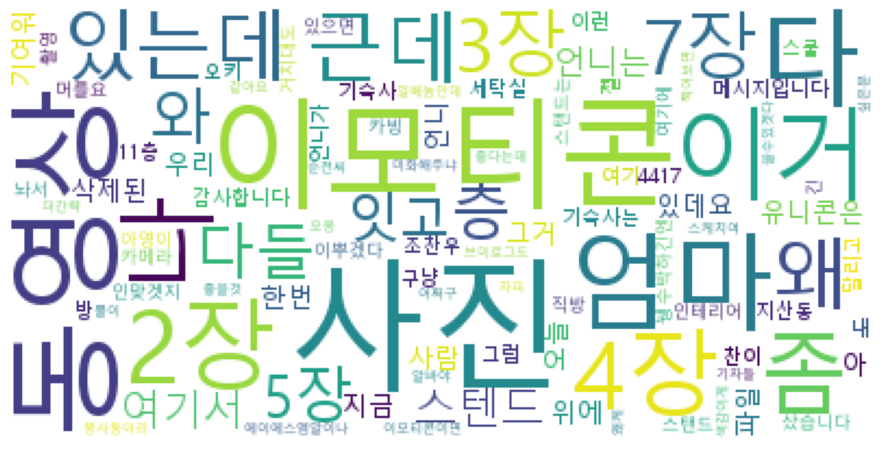

In [10]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [12]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    if platform.system() == 'Darwin':
      rc('font', family='NanumBarunGothic')
    elif platform.system() == 'Windows':
      rc('font', family='NanumBarunGothic')
    else:
      print('Unknown system... sorry~~~~')


    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Unknown system... sorry~~~~


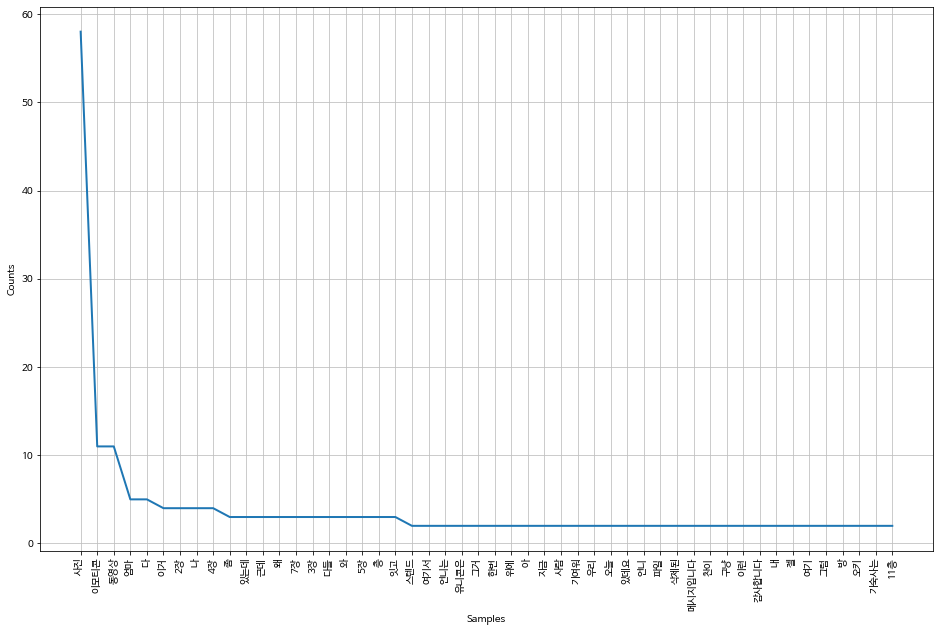

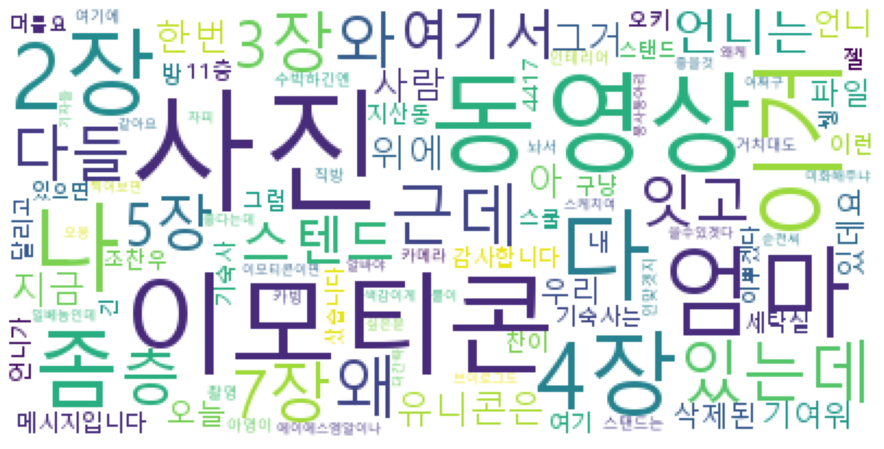

In [13]:
user_freq_analysis("쪼아", data, author2doc)